# Paper 2: "Predictive Modeling of Aircraft Flight Delay"

## Reading The Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# All imports
import csv
import os
import pandas as pd
import numpy as np 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read the path
file_path = "/content/drive/My Drive/ENSF544-Project1/2016/"

#list all the files from the directory
file_list = os.listdir(file_path)

#append all files together to be one file       
df = pd.concat([pd.read_csv(file_path + f) for f in file_list ], ignore_index=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2016,1,2,27,6,AA,19805,N3CDAA,224,LAS,...,0.0,209.0,194.0,173.0,1514.0,NaN,NaN,NaN,NaN,NaN
1,2016,1,2,28,7,AA,19805,N3AGAA,224,LAS,...,0.0,209.0,207.0,188.0,1514.0,NaN,NaN,NaN,NaN,NaN
2,2016,1,2,29,1,AA,19805,N3BPAA,224,LAS,...,0.0,209.0,205.0,172.0,1514.0,NaN,NaN,NaN,NaN,NaN
3,2016,1,2,1,1,AA,19805,N3LXAA,227,SNA,...,0.0,238.0,217.0,184.0,1726.0,NaN,NaN,NaN,NaN,NaN
4,2016,1,2,2,2,AA,19805,N3LUAA,227,SNA,...,0.0,238.0,237.0,197.0,1726.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617653,2016,1,1,31,7,WN,19393,N950WN,163,TUS,...,0.0,95.0,135.0,95.0,451.0,0.0,0.0,40.0,0.0,0.0
5617654,2016,1,1,31,7,WN,19393,N372SW,1094,TUS,...,0.0,90.0,99.0,82.0,451.0,5.0,0.0,9.0,0.0,12.0
5617655,2016,1,1,31,7,WN,19393,N216WR,2225,TUS,...,0.0,200.0,191.0,173.0,1440.0,28.0,0.0,0.0,0.0,0.0
5617656,2016,1,1,31,7,WN,19393,N8651A,2899,TUS,...,0.0,75.0,102.0,83.0,368.0,0.0,0.0,24.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617658 entries, 0 to 5617657
Data columns (total 37 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   QUARTER                int64  
 2   MONTH                  int64  
 3   DAY_OF_MONTH           int64  
 4   DAY_OF_WEEK            int64  
 5   OP_UNIQUE_CARRIER      object 
 6   OP_CARRIER_AIRLINE_ID  int64  
 7   TAIL_NUM               object 
 8   OP_CARRIER_FL_NUM      int64  
 9   ORIGIN                 object 
 10  ORIGIN_WAC             int64  
 11  DEST                   object 
 12  DEST_WAC               int64  
 13  CRS_DEP_TIME           int64  
 14  DEP_TIME               float64
 15  DEP_DELAY              float64
 16  DEP_DELAY_NEW          float64
 17  DEP_DEL15              float64
 18  TAXI_OUT               float64
 19  TAXI_IN                float64
 20  CRS_ARR_TIME           int64  
 21  ARR_TIME               float64
 22  ARR_DELAY         

In [5]:
df.shape

(5617658, 37)

In [6]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_WAC,DEST_WAC,CRS_DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,5617658.0,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,5.617658e+06,...,5.617658e+06,5.617652e+06,5.538145e+06,5.538145e+06,5.617658e+06,964239.000000,964239.000000,964239.000000,964239.000000,964239.000000
mean,2016.0,2.511934e+00,6.535810e+00,1.577741e+01,3.933906e+00,1.990205e+04,2.078520e+03,5.579216e+01,5.579250e+01,1.331004e+03,...,2.430194e-03,1.453971e+02,1.401608e+02,1.165268e+02,8.500786e+02,20.257775,2.702736,14.696167,0.084963,24.328406
std,0.0,1.105887e+00,3.400847e+00,8.789841e+00,1.985502e+00,3.808170e+02,1.700417e+03,2.703118e+01,2.703196e+01,4.895842e+02,...,4.923707e-02,7.642798e+01,7.566283e+01,7.352773e+01,6.195001e+02,57.341275,21.394475,30.584197,2.419614,45.963177
min,2016.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,5.000000e+00,1.400000e+01,4.000000e+00,2.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,7.110000e+02,3.400000e+01,3.400000e+01,9.150000e+02,...,0.000000e+00,8.800000e+01,8.400000e+01,6.200000e+01,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,1.639000e+03,5.200000e+01,5.200000e+01,1.325000e+03,...,0.000000e+00,1.260000e+02,1.210000e+02,9.700000e+01,6.780000e+02,1.000000,0.000000,2.000000,0.000000,2.000000
75%,2016.0,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,2.030400e+04,2.855000e+03,8.200000e+01,8.200000e+01,1.735000e+03,...,0.000000e+00,1.780000e+02,1.730000e+02,1.480000e+02,1.091000e+03,18.000000,0.000000,19.000000,0.000000,30.000000
max,2016.0,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.117100e+04,8.402000e+03,9.300000e+01,9.300000e+01,2.359000e+03,...,1.000000e+00,7.050000e+02,7.780000e+02,7.230000e+02,4.983000e+03,2142.000000,1157.000000,1446.000000,474.000000,1484.000000


In [7]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2016,1,2,27,6,AA,19805,N3CDAA,224,LAS,...,0.0,209.0,194.0,173.0,1514.0,NaN,NaN,NaN,NaN,NaN
1,2016,1,2,28,7,AA,19805,N3AGAA,224,LAS,...,0.0,209.0,207.0,188.0,1514.0,NaN,NaN,NaN,NaN,NaN
2,2016,1,2,29,1,AA,19805,N3BPAA,224,LAS,...,0.0,209.0,205.0,172.0,1514.0,NaN,NaN,NaN,NaN,NaN
3,2016,1,2,1,1,AA,19805,N3LXAA,227,SNA,...,0.0,238.0,217.0,184.0,1726.0,NaN,NaN,NaN,NaN,NaN
4,2016,1,2,2,2,AA,19805,N3LUAA,227,SNA,...,0.0,238.0,237.0,197.0,1726.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
5617653,2016,1,1,31,7,WN,19393,N950WN,163,TUS,...,0.0,95.0,135.0,95.0,451.0,0.0,0.0,40.0,0.0,0.0
5617654,2016,1,1,31,7,WN,19393,N372SW,1094,TUS,...,0.0,90.0,99.0,82.0,451.0,5.0,0.0,9.0,0.0,12.0
5617655,2016,1,1,31,7,WN,19393,N216WR,2225,TUS,...,0.0,200.0,191.0,173.0,1440.0,28.0,0.0,0.0,0.0,0.0
5617656,2016,1,1,31,7,WN,19393,N8651A,2899,TUS,...,0.0,75.0,102.0,83.0,368.0,0.0,0.0,24.0,0.0,0.0
5617657,2016,1,1,31,7,WN,19393,N7732A,2993,TUS,...,0.0,75.0,86.0,68.0,368.0,200.0,0.0,11.0,0.0,0.0


## Preprocessing and Preparation

The paper didn't mention any methods of preprocessing data; and thus, I have implemented my own technique by researching commonly used methods.

Finding the percentage of null values in each column

In [9]:
# Sum of number of null data
null_data = df.isnull().sum()
# Percentage of null data
perc_null = null_data*100/df.shape[0]
perc_null

YEAR                      0.000000
QUARTER                   0.000000
MONTH                     0.000000
DAY_OF_MONTH              0.000000
DAY_OF_WEEK               0.000000
OP_UNIQUE_CARRIER         0.000000
OP_CARRIER_AIRLINE_ID     0.000000
TAIL_NUM                  0.229491
OP_CARRIER_FL_NUM         0.000000
ORIGIN                    0.000000
ORIGIN_WAC                0.000000
DEST                      0.000000
DEST_WAC                  0.000000
CRS_DEP_TIME              0.000000
DEP_TIME                  1.129581
DEP_DELAY                 1.129581
DEP_DELAY_NEW             1.129581
DEP_DEL15                 1.129581
TAXI_OUT                  1.164507
TAXI_IN                   1.207692
CRS_ARR_TIME              0.000000
ARR_TIME                  1.207692
ARR_DELAY                 1.415412
ARR_DELAY_NEW             1.415412
ARR_DEL15                 1.415412
CANCELLED                 0.000000
CANCELLATION_CODE        98.827608
DIVERTED                  0.000000
CRS_ELAPSED_TIME    

For the different reasons of delay, if the data is null then I filled it with a value of zero because it has no effect on the delay

In [10]:
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

In [11]:
# Sum of number of null data
null_data = df.isnull().sum()
# Percentage of null data
perc_null = null_data*100/df.shape[0]
perc_null

YEAR                      0.000000
QUARTER                   0.000000
MONTH                     0.000000
DAY_OF_MONTH              0.000000
DAY_OF_WEEK               0.000000
OP_UNIQUE_CARRIER         0.000000
OP_CARRIER_AIRLINE_ID     0.000000
TAIL_NUM                  0.229491
OP_CARRIER_FL_NUM         0.000000
ORIGIN                    0.000000
ORIGIN_WAC                0.000000
DEST                      0.000000
DEST_WAC                  0.000000
CRS_DEP_TIME              0.000000
DEP_TIME                  1.129581
DEP_DELAY                 1.129581
DEP_DELAY_NEW             1.129581
DEP_DEL15                 1.129581
TAXI_OUT                  1.164507
TAXI_IN                   1.207692
CRS_ARR_TIME              0.000000
ARR_TIME                  1.207692
ARR_DELAY                 1.415412
ARR_DELAY_NEW             1.415412
ARR_DEL15                 1.415412
CANCELLED                 0.000000
CANCELLATION_CODE        98.827608
DIVERTED                  0.000000
CRS_ELAPSED_TIME    

Cleaning the data from missing values

In [12]:
# Dropping subset of null values

df1 = df.dropna(subset = ['TAIL_NUM', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME'])

In [13]:
df1.shape

(5538145, 37)

In [14]:
# Renaming some columns to convey their content

df1.rename({'CRS_DEP_TIME': 'SCHEDULED_DEP_TIME', 'CRS_ARR_TIME': 'SCHEDULED_ARR_TIME', 'OP_UNIQUE_CARRIER' : 'AIRLINE', 'OP_CARRIER_FL_NUM' : 'FLIGHT_NUM', 'CRS_ELAPSED_TIME' : 'SCHEDULED_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME' : 'ELAPSED_TIME', 'DAY_OF_MONTH' : 'DAY'}, axis=1, inplace=True)
for col in df1.columns:
  print(col)

YEAR
QUARTER
MONTH
DAY
DAY_OF_WEEK
AIRLINE
OP_CARRIER_AIRLINE_ID
TAIL_NUM
FLIGHT_NUM
ORIGIN
ORIGIN_WAC
DEST
DEST_WAC
SCHEDULED_DEP_TIME
DEP_TIME
DEP_DELAY
DEP_DELAY_NEW
DEP_DEL15
TAXI_OUT
TAXI_IN
SCHEDULED_ARR_TIME
ARR_TIME
ARR_DELAY
ARR_DELAY_NEW
ARR_DEL15
CANCELLED
CANCELLATION_CODE
DIVERTED
SCHEDULED_ELAPSED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
CARRIER_DELAY
WEATHER_DELAY
NAS_DELAY
SECURITY_DELAY
LATE_AIRCRAFT_DELAY


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Creating Final Required data

In [15]:
req_df = df1.drop(['YEAR', 'MONTH', 'DAY', 'TAIL_NUM', 'FLIGHT_NUM', 'SCHEDULED_DEP_TIME', 'DEP_TIME', 'SCHEDULED_ARR_TIME', 'ARR_TIME', 'CANCELLED', 'OP_CARRIER_AIRLINE_ID', 'ORIGIN_WAC', 'DEST_WAC', 'DEP_DELAY_NEW', 'ARR_DELAY_NEW', 'CANCELLATION_CODE', 'QUARTER', 'DEP_DEL15', 'ARR_DEL15'], axis = 1)
req_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538145 entries, 0 to 5617657
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DAY_OF_WEEK             int64  
 1   AIRLINE                 object 
 2   ORIGIN                  object 
 3   DEST                    object 
 4   DEP_DELAY               float64
 5   TAXI_OUT                float64
 6   TAXI_IN                 float64
 7   ARR_DELAY               float64
 8   DIVERTED                float64
 9   SCHEDULED_ELAPSED_TIME  float64
 10  ELAPSED_TIME            float64
 11  AIR_TIME                float64
 12  DISTANCE                float64
 13  CARRIER_DELAY           float64
 14  WEATHER_DELAY           float64
 15  NAS_DELAY               float64
 16  SECURITY_DELAY          float64
 17  LATE_AIRCRAFT_DELAY     float64
dtypes: float64(14), int64(1), object(3)
memory usage: 802.8+ MB


In [16]:
# To show that no attributes has null values
req_df.isnull().sum()

DAY_OF_WEEK               0
AIRLINE                   0
ORIGIN                    0
DEST                      0
DEP_DELAY                 0
TAXI_OUT                  0
TAXI_IN                   0
ARR_DELAY                 0
DIVERTED                  0
SCHEDULED_ELAPSED_TIME    0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
CARRIER_DELAY             0
WEATHER_DELAY             0
NAS_DELAY                 0
SECURITY_DELAY            0
LATE_AIRCRAFT_DELAY       0
dtype: int64

In [17]:
req_df.shape

(5538145, 18)

## Data Analysis Plots

###From the Paper

Predictor Plot Correlation 

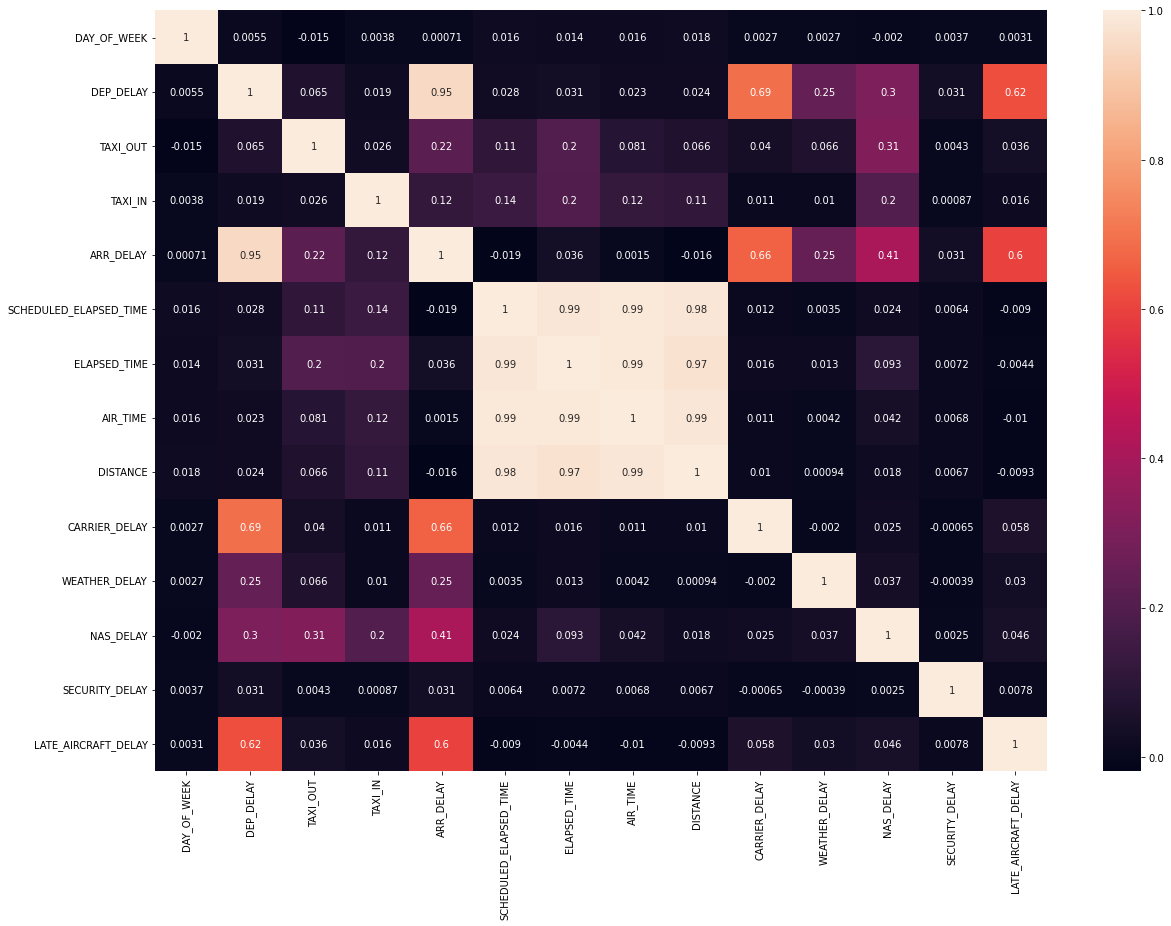

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(req_df.loc[:, req_df.columns != 'DIVERTED'].corr(),annot = True)
plt.show()

Scatter Plot Matrix of All Variables

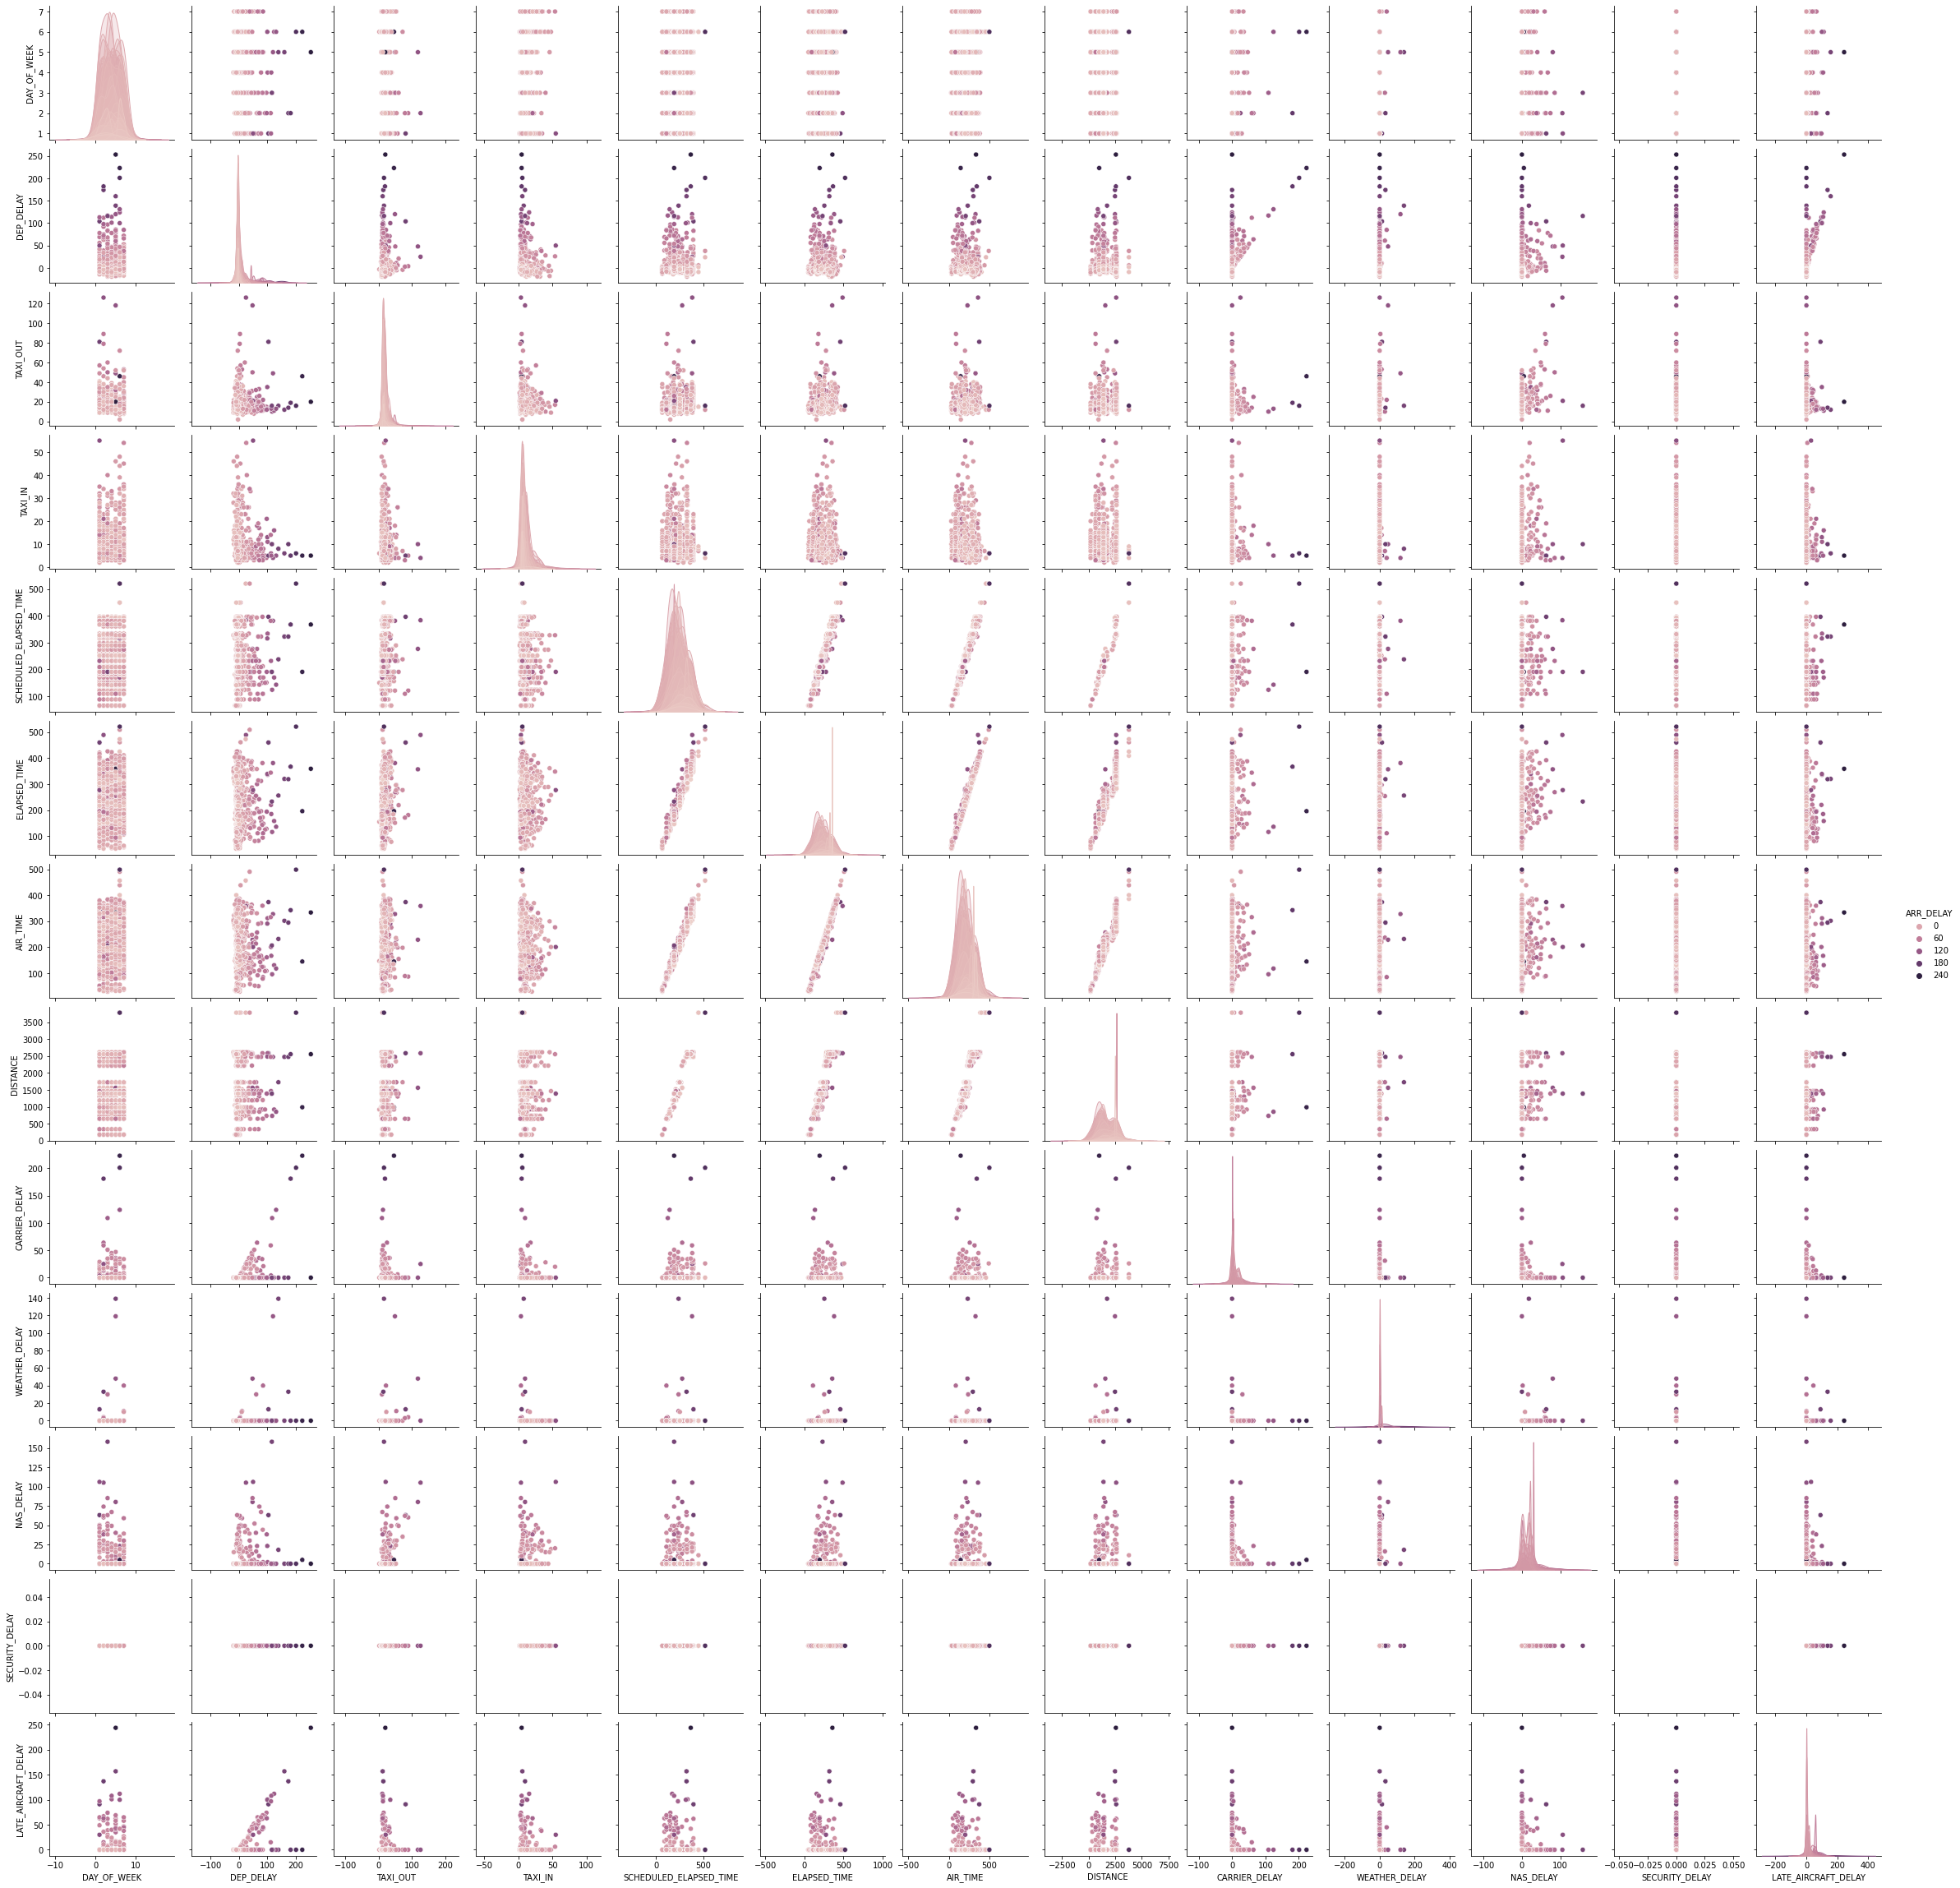

In [ ]:
sns.pairplot(req_df.loc[:, req_df.columns != 'DIVERTED'].head(1000), hue='ARR_DELAY') # Took only the first 1000 because the data was too big

### Exploratory

Taxi Time (TAXI_OUT and TAXI_IN)

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: red)')]

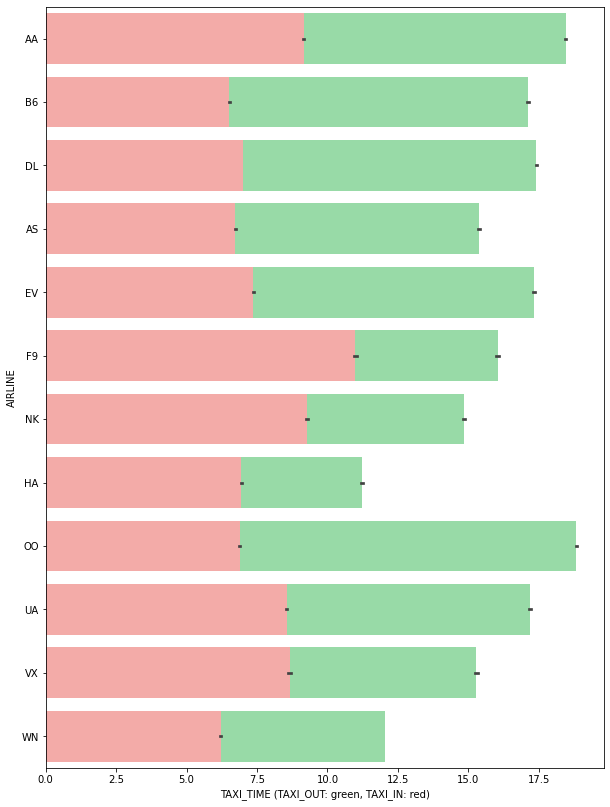

In [ ]:
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=req_df, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=req_df, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: red)")

Scatter Plot of Airlines vs Arrival Delay

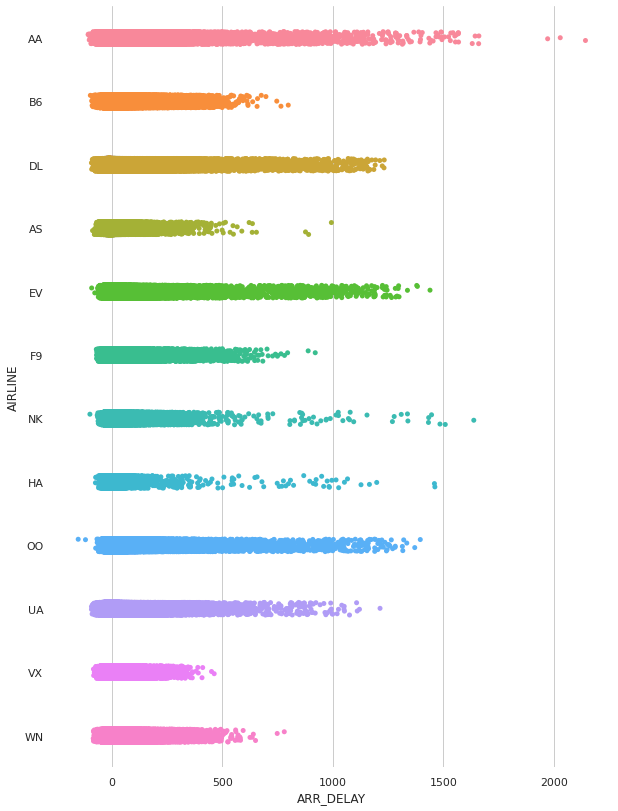

In [ ]:
sns.set(style="whitegrid")
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARR_DELAY", y="AIRLINE", data = req_df, dodge=True, jitter=True)
plt.show()

## Applying Models

"In regression, the order of the variables is very important. The explanatory variable (or the independent variable) always belongs on the x-axis. The response variable (or the dependent variable) always belongs on the y-axis." **Our Response is ARR_DELAY.**

In [18]:
# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression # Multiple Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=10) # Only used 10 trees because the proposed 500 trees took too long to execute
  ]

In [20]:
# Label encoding features to change categorical variables into numerical ones
le = LabelEncoder()

req_df['AIRLINE']= le.fit_transform(req_df['AIRLINE'])
req_df['ORIGIN'] = le.fit_transform(req_df['ORIGIN'])
req_df['DEST'] = le.fit_transform(req_df['DEST'])

In [21]:
X = req_df.drop('ARR_DELAY',axis = 1)
X.shape

(5538145, 17)

In [22]:
y = req_df['ARR_DELAY']
y.shape

(5538145,)

In [23]:
# Splitting into train and test data set, train = 3/4 and test = 1/4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

### Model Fitting and Results

In [28]:
for model, name in zip(models, ['Linear Regression', 'Decision Tree Regressor', 'Random forest Regressor']):
  clf = model.fit(X_train, y_train)
  Y_predict = model.predict(X_test)

  print(name)
  print('Model Train Accuracy (score):', model.score(X_train, y_train))
  print('Model Test Accuracy (score):', model.score(X_test, y_test))
  print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict), "minutes")  
  print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
  print('R2:',r2_score(y_test, Y_predict))
  print()

Linear Regression
Model Train Accuracy (score): 0.9999999993184454
Model Test Accuracy (score): 0.9999999995788214
Mean Absolute Error: 2.2018607992789854e-06 minutes
Mean Squared Error: 7.222674318342604e-07
Root Mean Squared Error: 0.000849863184185702
R2: 0.9999999995788214

Decision Tree Regressor
Model Train Accuracy (score): 1.0
Model Test Accuracy (score): 0.9980115419758826
Mean Absolute Error: 0.48023635338022747 minutes
Mean Squared Error: 3.409950763323768
Root Mean Squared Error: 1.846605199636286
R2: 0.9980115419758826

Random forest Regressor
Model Train Accuracy (score): 0.9997965969811957
Model Test Accuracy (score): 0.9989532296696398
Mean Absolute Error: 0.3347003366468358 minutes
Mean Squared Error: 1.795077011304139
Root Mean Squared Error: 1.3398048407526146
R2: 0.9989532296696398



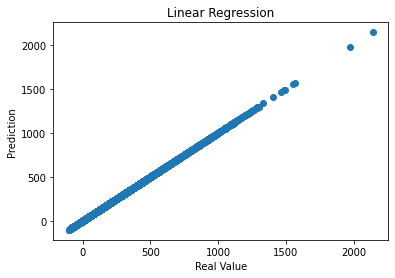

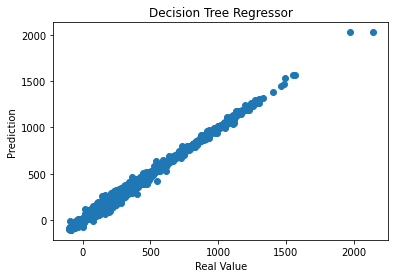

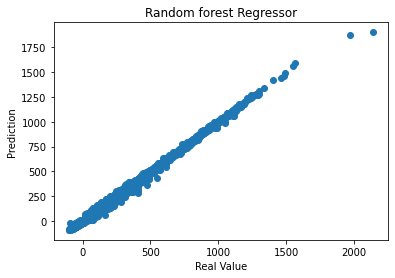

In [30]:
for model, name in zip(models, ['Linear Regression', 'Decision Tree Regressor', 'Random forest Regressor']):
  clf = model.fit(X_train, y_train)
  Y_predict = model.predict(X_test)

  clf = model.fit(X_train,y_train)
  Y_predict = clf.predict(X_test)
  print()
  plt.scatter(y_test, Y_predict)
  plt.title(name)
  plt.xlabel("Real Value")
  plt.ylabel("Prediction")
  plt.show()